<a href="https://colab.research.google.com/github/govindrvinod777/notes/blob/main/sept22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dict = {'first score': [100,90,np.nan,95,np.nan],
        'second score': [30,45,56,np.nan,np.nan],
        'third score': [np.nan,40,80,98,np.nan],
        'fifth score': [12,15,18,43,54]}

df = pd.DataFrame(dict)
df.head()

,first score,second score,third score,fifth score
0,100.0,30.0,NaN,12
1,90.0,45.0,40.0,15
2,NaN,56.0,80.0,18
3,95.0,NaN,98.0,43
4,NaN,NaN,NaN,54


In [ ]:
df.isna()

,first score,second score,third score,fifth score
0,False,False,True,False
1,False,False,False,False
2,True,False,False,False
3,False,True,False,False
4,True,True,True,False


In [ ]:
df.isna().sum()

,0
first score,2
second score,2
third score,2
fifth score,0


In [ ]:
df1 = df.copy()
df1.fillna(40)

,first score,second score,third score,fifth score
0,100.0,30.0,40.0,12
1,90.0,45.0,40.0,15
2,40.0,56.0,80.0,18
3,95.0,40.0,98.0,43
4,40.0,40.0,40.0,54


In [ ]:
df1.ffill()

,first score,second score,third score,fifth score
0,100.0,30.0,NaN,12
1,90.0,45.0,40.0,15
2,90.0,56.0,80.0,18
3,95.0,56.0,98.0,43
4,95.0,56.0,98.0,54


In [ ]:
df1.bfill()

,first score,second score,third score,fifth score
0,100.0,30.0,40.0,12
1,90.0,45.0,40.0,15
2,95.0,56.0,80.0,18
3,95.0,NaN,98.0,43
4,NaN,NaN,NaN,54


In [ ]:
replace_vals={'first score':10.1,'second score':30.1}
df1.fillna(replace_vals)

,first score,second score,third score,fifth score
0,100.0,30.0,NaN,12
1,90.0,45.0,40.0,15
2,10.1,56.0,80.0,18
3,95.0,30.1,98.0,43
4,10.1,30.1,NaN,54


In [ ]:
df1.fillna(df1.mean())

,first score,second score,third score,fifth score
0,100.0,30.000000,72.666667,12
1,90.0,45.000000,40.000000,15
2,95.0,56.000000,80.000000,18
3,95.0,43.666667,98.000000,43
4,95.0,43.666667,72.666667,54


In [ ]:
df1.fillna(df1.median())

,first score,second score,third score,fifth score
0,100.0,30.0,80.0,12
1,90.0,45.0,40.0,15
2,95.0,56.0,80.0,18
3,95.0,45.0,98.0,43
4,95.0,45.0,80.0,54


In [ ]:
df1['first score'].fillna(df1['fifth score'])

,first score
0,100.0
1,90.0
2,18.0
3,95.0
4,54.0


In [ ]:
(df1['first score'].isna()) & (df1['fifth score']>20)

,0
0,False
1,False
2,False
3,False
4,True


In [ ]:
df1.loc[(df1['first score'].isna()) & (df1['fifth score']>20)]

,first score,second score,third score,fifth score
4,NaN,NaN,NaN,54


In [ ]:
df1.loc[(df1['first score'].isna()) & (df1['fifth score']>20),'first score']=250

In [ ]:
df1

,first score,second score,third score,fifth score
0,100.0,30.0,NaN,12
1,90.0,45.0,40.0,15
2,NaN,56.0,80.0,18
3,95.0,NaN,98.0,43
4,250.0,NaN,NaN,54


In [ ]:
df1

,first score,second score,third score,fifth score
0,100.0,30.0,NaN,12
1,90.0,45.0,40.0,15
2,NaN,56.0,80.0,18
3,95.0,NaN,98.0,43
4,250.0,NaN,NaN,54


In [ ]:
hr = pd.read_csv("/content/hr_employees.csv")
hr.head()

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,NaN,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,NaN,HR,45000.0,2.0,Bachelors


In [ ]:
hr

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,NaN,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,NaN,HR,45000.0,2.0,Bachelors


In [ ]:
(hr['Age']).isna() & (hr['Education']=='Bachelors')

,0
0,False
1,False
2,False
3,False
4,True


In [ ]:
hr.loc[(hr['Age'].isna()) & (hr['Education']=='Bachelors'),'Age']=28

In [ ]:
hr

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,NaN,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,28.0,HR,45000.0,2.0,Bachelors


In [ ]:
hr['Salary'] = pd.to_numeric(hr['Salary'], errors='coerce')
hr.fillna({'Salary': hr['Salary'].mean()}, inplace=True)

In [ ]:
hr['Age'] = pd.to_numeric(hr['Age'], errors='coerce')
hr.fillna({'Age': hr['Age'].median()}, inplace=True)

In [ ]:
(hr['Education'].isna()) & (hr['Education']=='Age')

,Education
0,False
1,False
2,False
3,False
4,False


In [ ]:
hr.loc[hr['Education']=='Age', 'Education'] = 'phd'

In [ ]:
hr['Experience'] = pd.to_numeric(hr['Experience'], errors='coerce')

In [ ]:
hr.fillna({'Experience': hr['Experience'].mean()}, inplace=True)

In [ ]:
hr

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,32.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,49250.0,5.0,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,28.0,HR,45000.0,2.0,Bachelors


In [ ]:
beer = pd.read_csv("/content/beer-servings (1).csv")
beer.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
beer

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
num_cols = beer.select_dtypes(include='float64')
num_cols

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,NaN,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

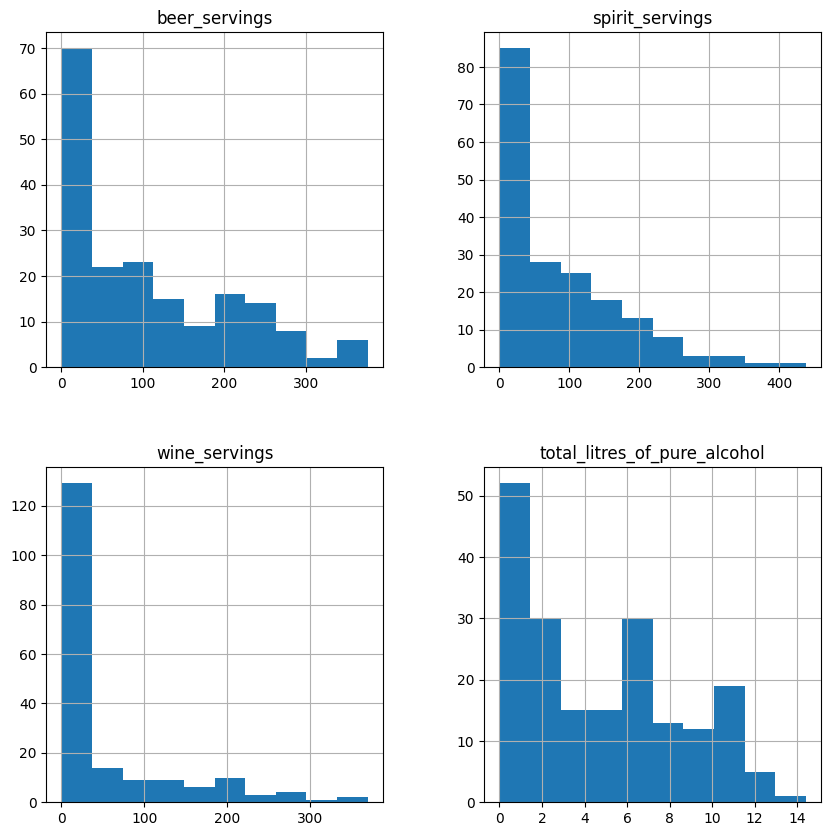

In [ ]:
num_cols.hist(figsize=(10,10))

In [ ]:
beer.fillna({'beer_servings': beer['beer_servings'].median()},inplace=True)

In [ ]:
beer.fillna({'spirit_servings': beer['spirit_servings'].median()},inplace=True)

In [ ]:
beer.fillna({'wine_servings': beer['wine_servings'].median()},inplace=True)

In [ ]:
beer.fillna({'total_litres_of_pure_alcohol': beer['total_litres_of_pure_alcohol'].median()},inplace=True)

In [ ]:
beer.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,6
total_litres_of_pure_alcohol,0
continent,0


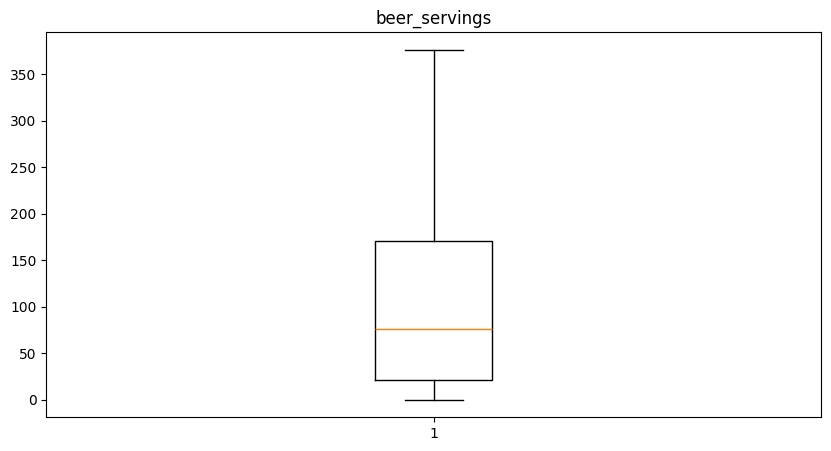

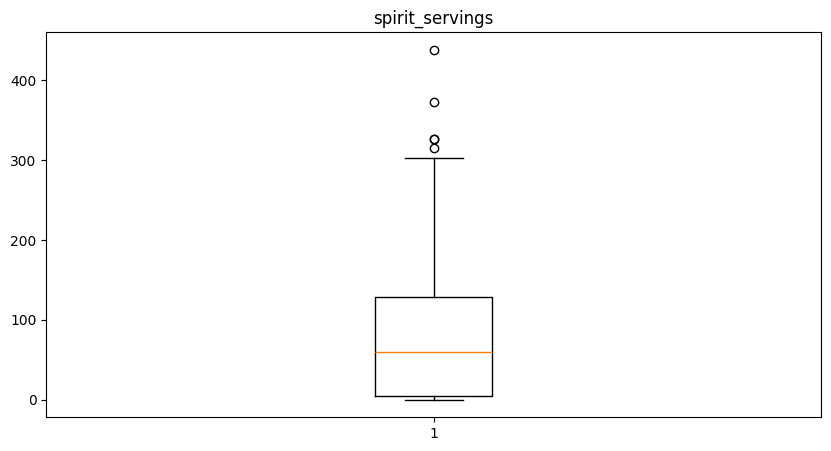

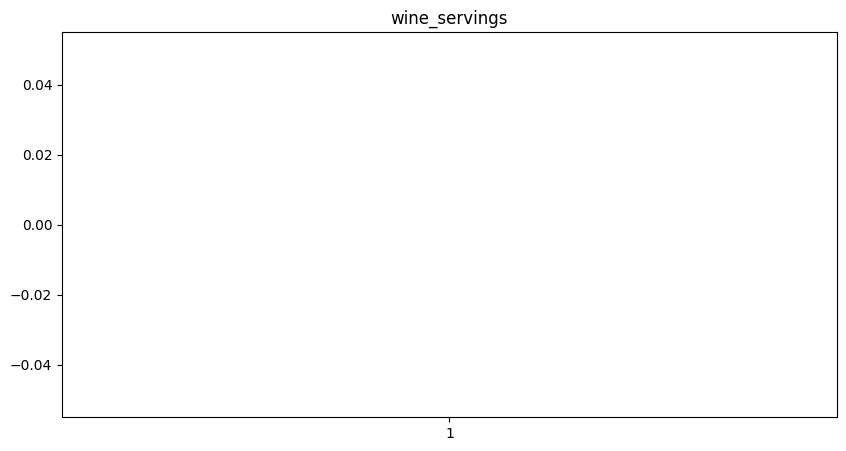

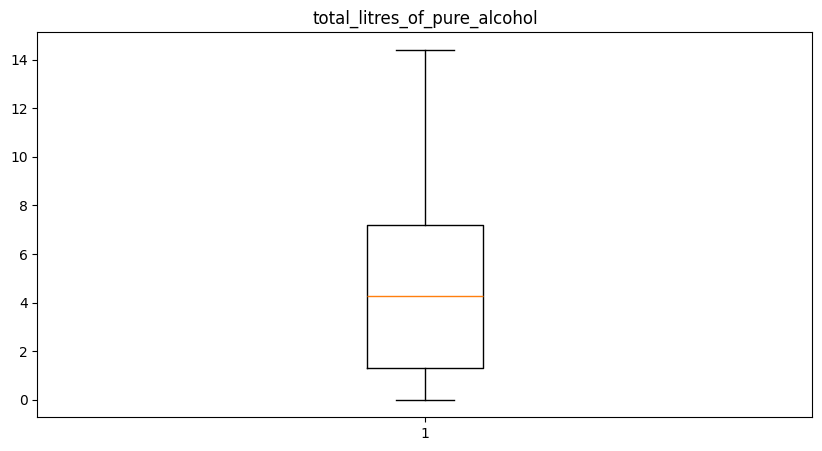

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.boxplot(beer[i])
  plt.title(i)

In [ ]:
q1 = np.quantile(beer['spirit_servings'],0.25)
q3 = np.quantile(beer['spirit_servings'],0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

312.5
-179.5
123.0


In [ ]:
spirit_outliers = []
for i in beer['spirit_servings']:
  if i>upper_bound or i<lower_bound:
    spirit_outliers.append(i)

In [ ]:
spirit_outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
beer['spirit_servings'] = beer['spirit_servings'].clip(lower=lower_bound,upper=upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e1575ee0ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e1575cbc650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e1575af2450>],
 'medians': [<matplotlib.lines.Line2D at 0x7e1575cbcc20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e1575cbd0a0>],
 'means': []}

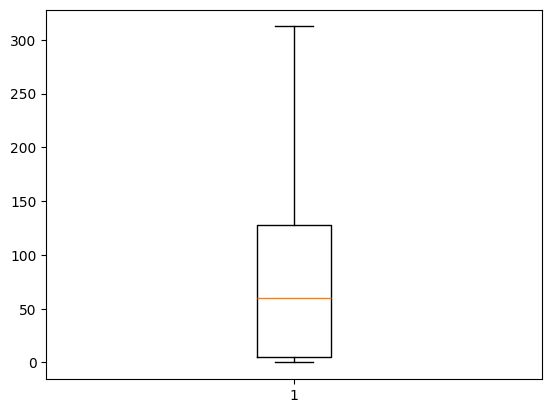

In [ ]:
plt.boxplot(beer['spirit_servings'])

In [ ]:
import numpy as np


In [ ]:
beer

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
q1 = np.quantile(beer['wine_servings'],0.25)
q3 = np.quantile(beer['wine_servings'],0.75)
iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

146.0
-86.0
58.0


In [ ]:
wine_outliers = []
for i in beer['wine_servings']:
  if i>upper_bound or i<lower_bound:
    wine_outliers.append(i)

In [ ]:
wine_outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [ ]:
beer['wine_servings'] = beer['wine_servings'].clip(lower=lower_bound,upper=upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e15759c4f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e15759c53a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e15759c4c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7e15759c59a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e15759c5cd0>],
 'means': []}

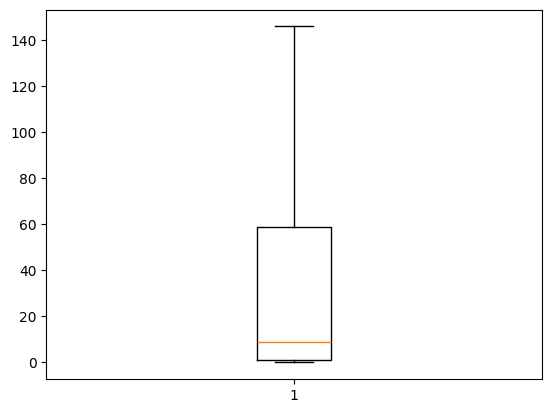

In [ ]:
plt.boxplot(beer['wine_servings'])

In [ ]:
import seaborn as sns

In [ ]:
titanic_df = sns.load_dataset("titanic")

In [ ]:
titanic_df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

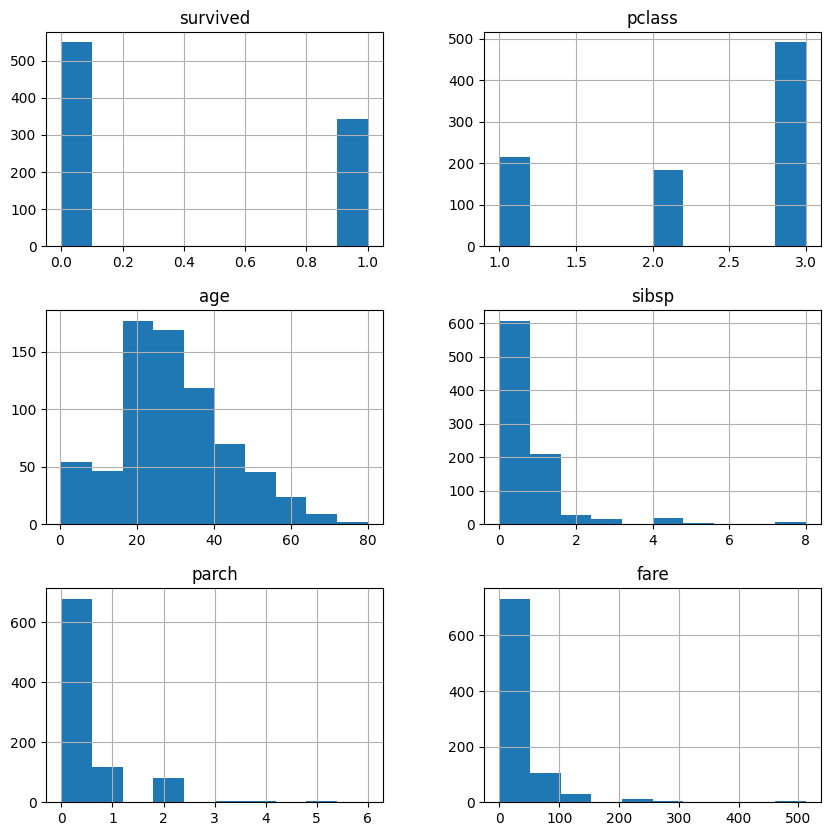

In [ ]:
titanic_df.hist(figsize=(10,10))

In [ ]:
titanic_df.drop("deck",axis=1,inplace=True)

In [ ]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
titanic_df.fillna({'age':titanic_df['age'].median()},inplace=True)


In [ ]:
titanic_df.isna().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

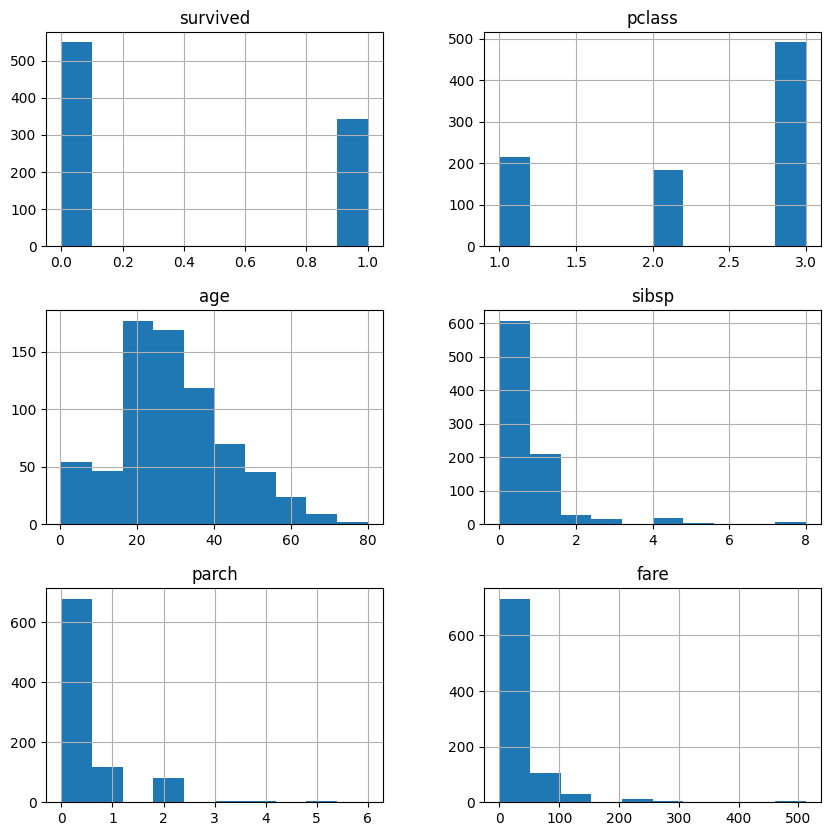

In [ ]:
titanic_df.hist(figsize=(10,10))

In [ ]:
titanic_df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
titanic_df.fillna({'age':titanic_df['age'].median()}, inplace=True)

In [ ]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<Axes: >

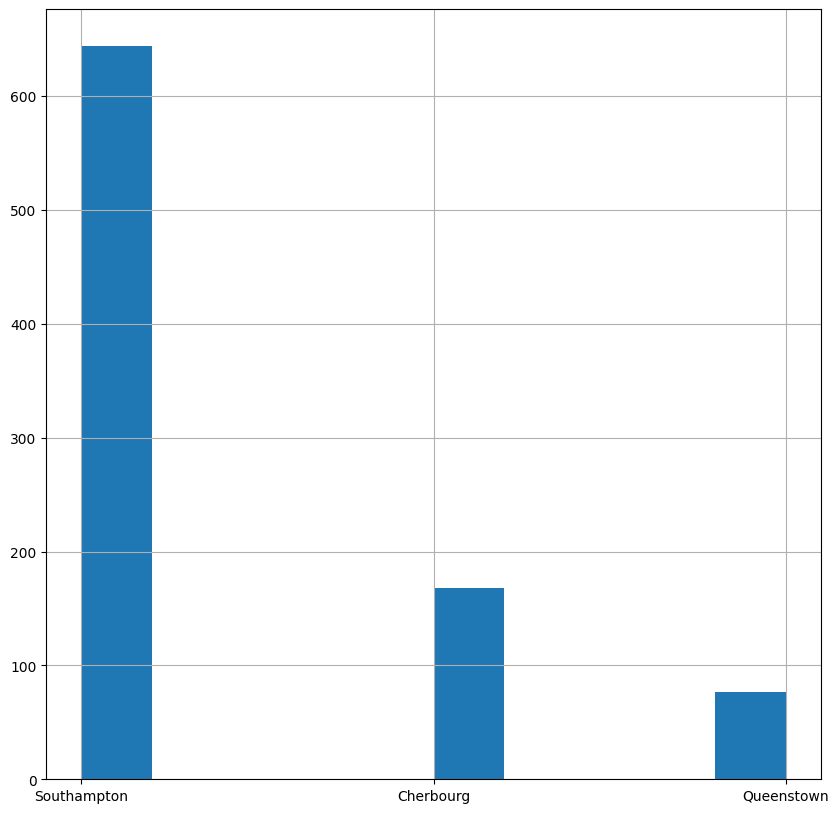

In [ ]:
titanic_df['embark_town'].hist(figsize=(10,10))

In [ ]:
titanic_df['embarked']=titanic_df['embarked'].ffill()

In [ ]:
titanic_df['embark_town']=titanic_df['embark_town'].ffill()

In [ ]:
titanic_df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
titanic_df = titanic_df.drop(['alive','class','alone','embarked','adult_male'],axis=1)

In [ ]:
num_col = titanic_df.select_dtypes(include='float64')
num_col

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


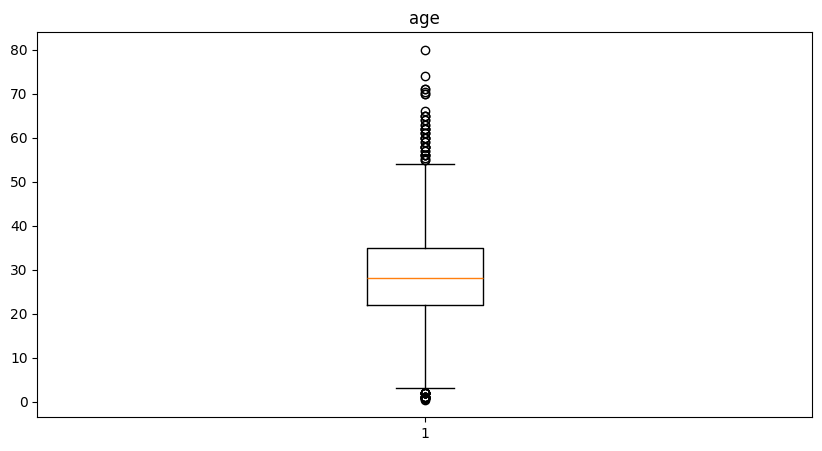

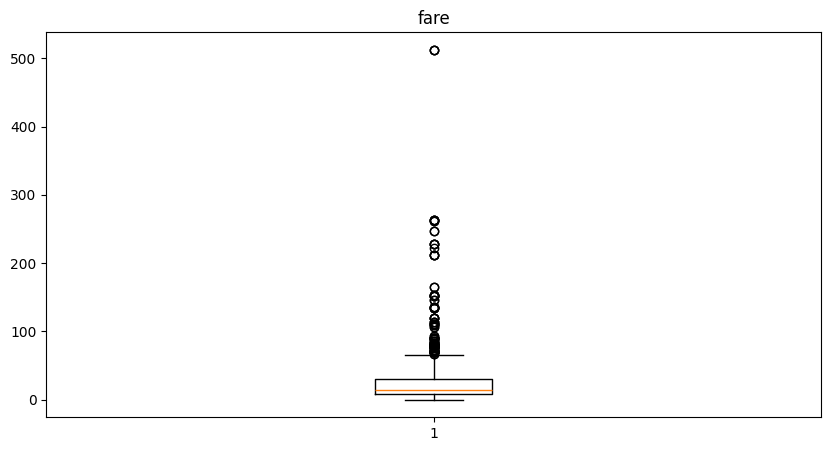

In [ ]:
for i in num_col:
    plt.figure(figsize=(10,5))
    plt.boxplot(titanic_df[i])
    plt.title(i)


In [ ]:
q1 = np.quantile(titanic_df['age'],0.25)
q3 = np.quantile(titanic_df['age'],0.75)

iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(upper_bound)
print(lower_bound)
print(iqr)

54.5
2.5
13.0


In [ ]:
age_out = []
for i in titanic_df['age']:
  if i > upper_bound or i < lower_bound:
    age_out.append(i)

In [ ]:
titanic_df['age']=titanic_df['age'].clip(lower=lower_bound,upper=upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ebbaec2eff0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ebbaec2f620>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ebbaec2e6f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ebbaec2fb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ebbaec2fe90>],
 'means': []}

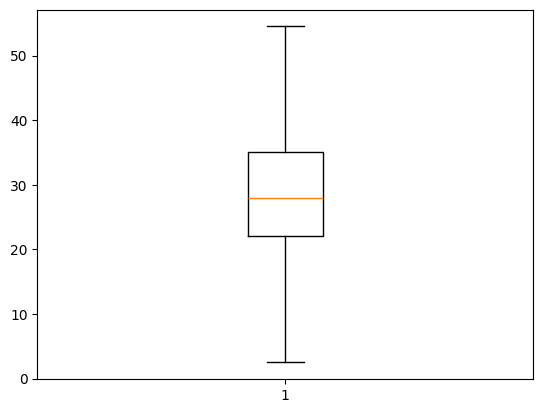

In [ ]:
plt.boxplot(titanic_df['age'])


In [ ]:
q1 = np.quantile(titanic_df['fare'],0.25)
q3 = np.quantile(titanic_df['fare'],0.75)

iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(upper_bound)
print(lower_bound)

65.6344
-26.724


In [ ]:
fare_out = []
for i in titanic_df['fare']:
  if i > upper_bound or i < lower_bound:
    fare_out.append(i)

In [ ]:
titanic_df['fare']=titanic_df['fare'].clip(lower=lower_bound,upper=upper_bound)